# Prologue

Forecasting short-term rainfall/precipitation from historical data from the past 20 years using ARIMA model. The expected output is to get the best parameters in the modeling so that the model can be used for forecasting rainfall.

Why is rainfall forecasting important?
Rainfall forecasting is very important because heavy and irregular rainfall can have many impacts like destruction of crops and farms, damage of property so a better forecasting model is essential for an early warning that can minimize risks to life and property and also managing the agricultural farms in better way.

# Import Library and Dataset

As mentioned earlier, this project aims to calculate the estimation of rainfall amounts (monthly rain average in mm/day) for the next three years after 2019 since the latest data that we have is in 2019. Here is the following libraries will be used to perform the analysis.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The data used in this analysis are from Giovanni. Giovanni is a Web interface that allows users to analyze NASA's gridded data from various satellite and surface observations. 

In [ ]:
## Import data from google drive
df = pd.read_csv('/content/drive/MyDrive/g4.areaAvgTimeSeries.TRMM_3B42_Daily_7_precipitation.19990101-20190101.180W_50S_180E_50N.csv')

## Read and Understand the Data

The downloaded dataset contains two columns and 7313 rows. As we can see, the dataset is a bit messy, so we need to figure out which row of data to start with.

In [ ]:
## Print out the raw data
df

,Title:,"Time Series, Area-Averaged of Precipitation Rate daily 0.25 deg. [TRMM ()"
0,User Start Date:,1999-01-01T00:00:00Z
1,User End Date:,2019-01-01T23:59:59Z
2,User Bounding Box:,NaN
3,Data Bounding Box:,NaN
4,URL to Reproduce Results:,https://giovanni.gsfc.nasa.gov/giovanni/#servi...
...,...,...
7308,2018-12-28,7.19602013
7309,2018-12-29,6.30557919
7310,2018-12-30,7.00499153
7311,2018-12-31,4.82450294


From the code below, we nocite that the precipitation data we will use starts from the 7th rows.

In [ ]:
## Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7313 entries, 0 to 7312
Data columns (total 2 columns):
 #   Column                                                                     Non-Null Count  Dtype 
---  ------                                                                     --------------  ----- 
 0   Title:                                                                     7313 non-null   object
 1   Time Series, Area-Averaged of Precipitation Rate daily 0.25 deg. [TRMM ()  7311 non-null   object
dtypes: object(2)
memory usage: 114.4+ KB


## Data Cleaning

In [ ]:
## Check missing value
df.isna().sum()

Title:                                                                       0
Time Series, Area-Averaged of Precipitation Rate daily 0.25 deg. [TRMM ()    2
dtype: int64

In [ ]:
## Check duplicated value
df.duplicated().sum()

0

In [ ]:
## Print out the first 10 rows to find out the unnecessary rows
df.head(10)

,Title:,"Time Series, Area-Averaged of Precipitation Rate daily 0.25 deg. [TRMM ()"
0,User Start Date:,1999-01-01T00:00:00Z
1,User End Date:,2019-01-01T23:59:59Z
2,User Bounding Box:,NaN
3,Data Bounding Box:,NaN
4,URL to Reproduce Results:,https://giovanni.gsfc.nasa.gov/giovanni/#servi...
5,Fill Value (mean_TRMM_3B42_Daily_7_precipitati...,-9999.9
6,time,mean_TRMM_3B42_Daily_7_precipitation
7,1999-01-01,14.9035263
8,1999-01-02,11.4257498
9,1999-01-03,7.94812012


Create a new dataframe contains data from the 7th rows. 

In [ ]:
## The data needed started from the 7th rows
df2 = df.tail(-7)
df2

,Title:,"Time Series, Area-Averaged of Precipitation Rate daily 0.25 deg. [TRMM ()"
7,1999-01-01,14.9035263
8,1999-01-02,11.4257498
9,1999-01-03,7.94812012
10,1999-01-04,12.7407541
11,1999-01-05,8.8068037
...,...,...
7308,2018-12-28,7.19602013
7309,2018-12-29,6.30557919
7310,2018-12-30,7.00499153
7311,2018-12-31,4.82450294


Here is the description of the data we have
- First column is the date
- Second column is the amount of the precipitation (daily average of precipitation in mm/day)

In [ ]:
## Rename the columns into Date and Precipitation
## The data in Precipitation column is the daily average of precipitation in Indonesia

df2.columns = ["Date", "Precipitation"]
df2

,Date,Precipitation
7,1999-01-01,14.9035263
8,1999-01-02,11.4257498
9,1999-01-03,7.94812012
10,1999-01-04,12.7407541
11,1999-01-05,8.8068037
...,...,...
7308,2018-12-28,7.19602013
7309,2018-12-29,6.30557919
7310,2018-12-30,7.00499153
7311,2018-12-31,4.82450294


## Changing Data Types

In [ ]:
## Convert 'Date' value into datetime
## Convert 'Precipitation' value into numeric
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Precipitation'] = pd.to_numeric(df2['Precipitation'])
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Date,Precipitation
7,1999-01-01,14.903526
8,1999-01-02,11.425750
9,1999-01-03,7.948120
10,1999-01-04,12.740754
11,1999-01-05,8.806804
...,...,...
7308,2018-12-28,7.196020
7309,2018-12-29,6.305579
7310,2018-12-30,7.004992
7311,2018-12-31,4.824503


In [ ]:
## Crosscheck the data
## Make sure the data doesn't contain missing value
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7306 entries, 7 to 7312
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           7306 non-null   datetime64[ns]
 1   Precipitation  7306 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 114.3 KB


## Exploratory Data Analysis

[Text(0.5, 1.0, 'Precipitation Distribution')]

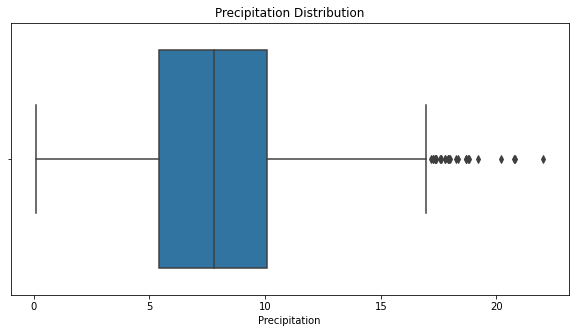

In [ ]:
## Precipitation distribution in boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x="Precipitation", data = df2).set(title = 'Precipitation Distribution')

[Text(0.5, 1.0, 'precipitation Timeseries from 01-Jan-1999 until 01-Jan-2019')]

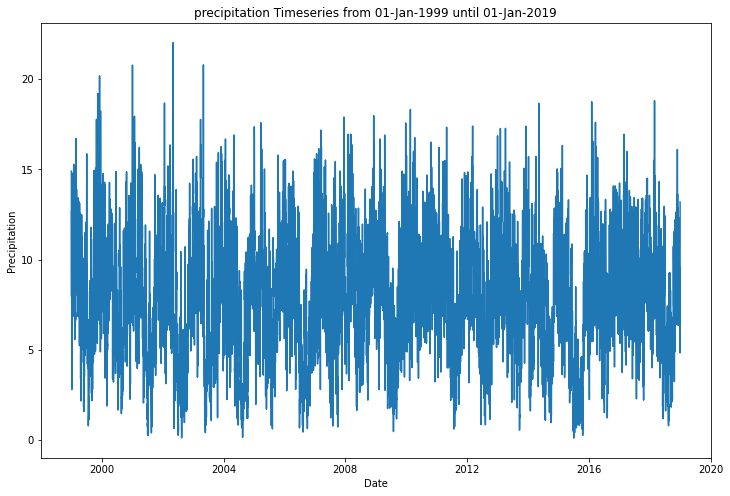

In [ ]:
## Plot the precipitation timeseries from 1999 until 2019
plt.figure(figsize=(12,8))
sns.lineplot(x="Date", y="Precipitation", data = df2).set(title = 'precipitation Timeseries from 01-Jan-1999 until 01-Jan-2019')

In [ ]:
## Calculate the monthly average of precipitation
df3 = df2.groupby(pd.PeriodIndex(df2['Date'], freq="M"))['Precipitation'].mean().reset_index()
df3["month"] = df3['Date'].map(lambda x: x.month)
df3["year"] = df3['Date'].map(lambda x: x.year)
df3

,Date,Precipitation,month,year
0,1999-01,10.000398,1,1999
1,1999-02,9.691330,2,1999
2,1999-03,10.648398,3,1999
3,1999-04,8.398030,4,1999
4,1999-05,7.350341,5,1999
...,...,...,...,...
236,2018-09,5.048592,9,2018
237,2018-10,6.844830,10,2018
238,2018-11,9.226878,11,2018
239,2018-12,9.107919,12,2018


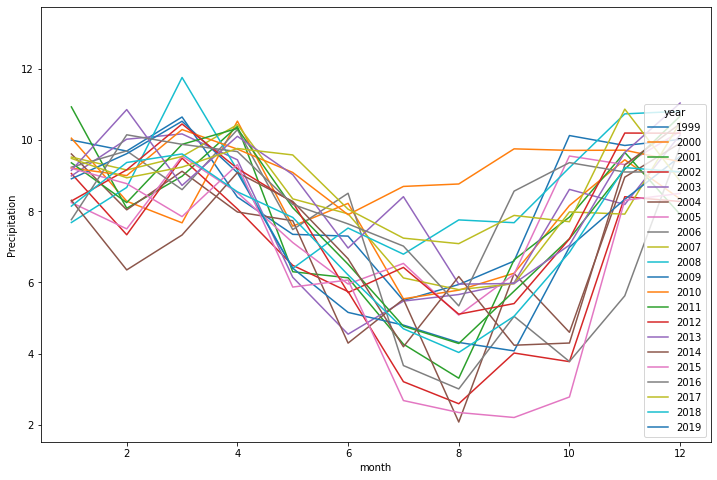

In [ ]:
## Plot the timeseries in lineplot for each year
plt.figure(figsize=(12,8))
sns.lineplot(x='month',y='Precipitation',hue='year',data=df3, palette='tab10')

In [ ]:
## Creating lineplot with column 'Date' (which just represent the month and the year) as an axis causing an error 
## Convert 'Date' column into datetime64[M] to handle the error
df3['dates'] = df3.Date.values.astype('datetime64[M]')
df3

,Date,Precipitation,month,year,dates
0,1999-01,10.000398,1,1999,1999-01-01
1,1999-02,9.691330,2,1999,1999-02-01
2,1999-03,10.648398,3,1999,1999-03-01
3,1999-04,8.398030,4,1999,1999-04-01
4,1999-05,7.350341,5,1999,1999-05-01
...,...,...,...,...,...
236,2018-09,5.048592,9,2018,2018-09-01
237,2018-10,6.844830,10,2018,2018-10-01
238,2018-11,9.226878,11,2018,2018-11-01
239,2018-12,9.107919,12,2018,2018-12-01


[Text(0.5, 1.0, 'Monthly Average of precipitation from 01-Jan-1999 until 01-Jan-2019')]

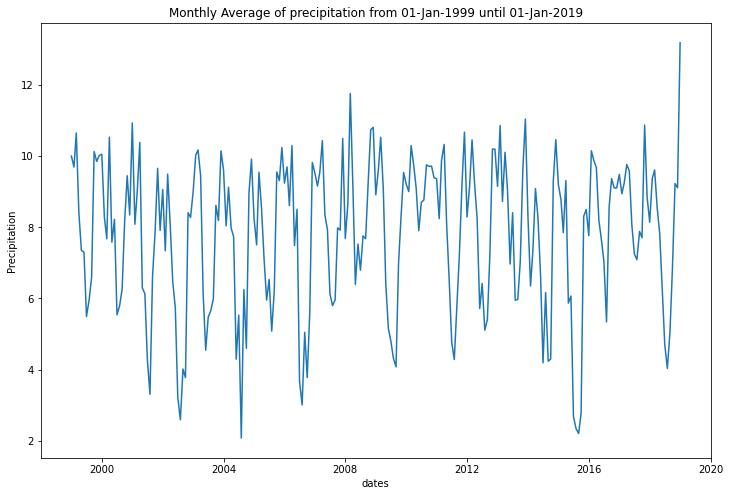

In [ ]:
## Plot monthly average of precipitation in a lineplot
plt.figure(figsize=(12,8))
sns.lineplot(x="dates", y="Precipitation", data = df3).set(title = 'Monthly Average of precipitation from 01-Jan-1999 until 01-Jan-2019')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


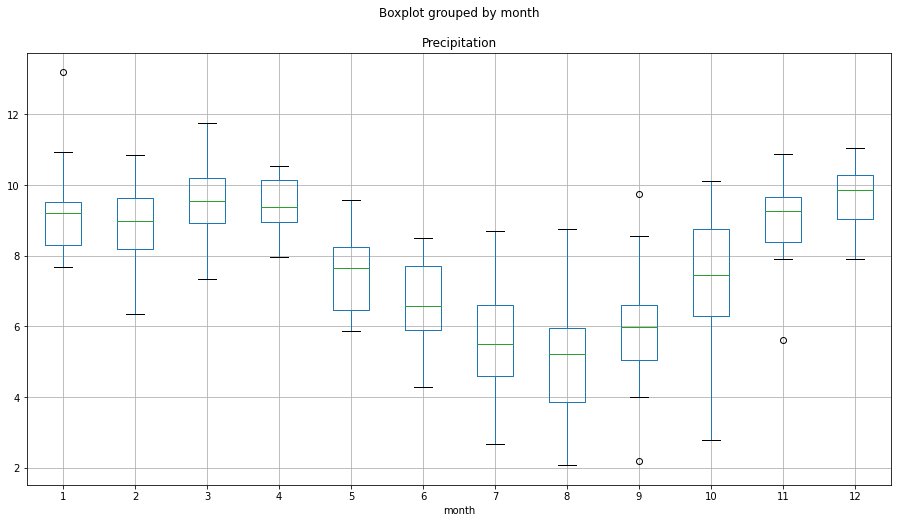

In [ ]:
## Distribution of the precipitation in every month from 1999 until 2019
df3.boxplot(figsize=(15,8),by='month',column='Precipitation')

In [ ]:
## break down the data into three portions, trend, seasonality, and random residual components
## use the Multiplicative model since the trend and seasonal are variated over time
df3.set_index('dates',inplace=True)
result=seasonal_decompose(df3['Precipitation'],model='additive')

Text(0.5, 0.98, 'Time Series Decomposition')

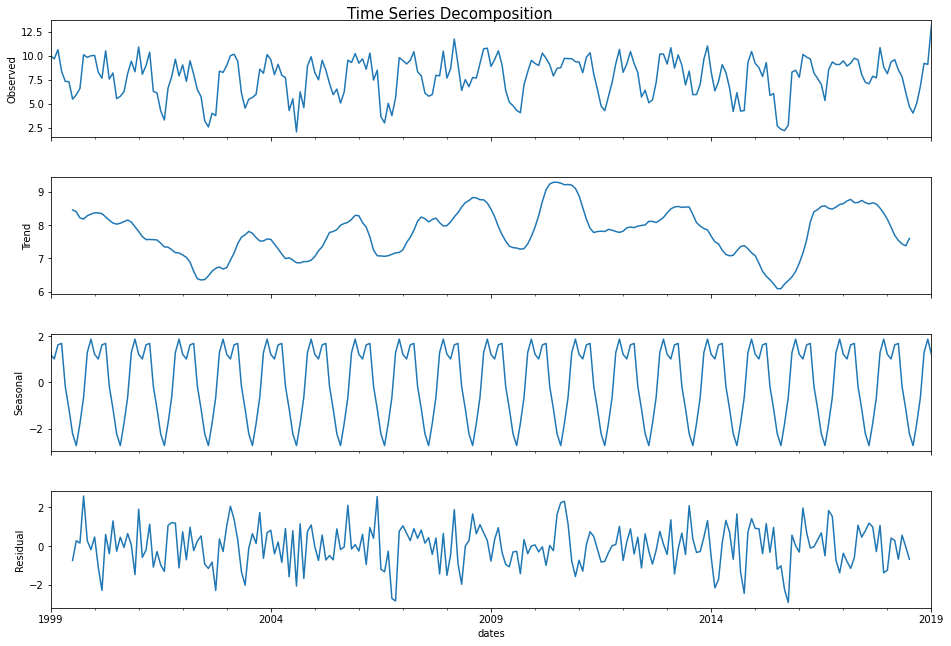

In [ ]:
## create time series decomposition to see the trend and seasonality
fig = result.plot()
fig.set_size_inches(15,10)
fig.suptitle("Time Series Decomposition", fontsize = 15)

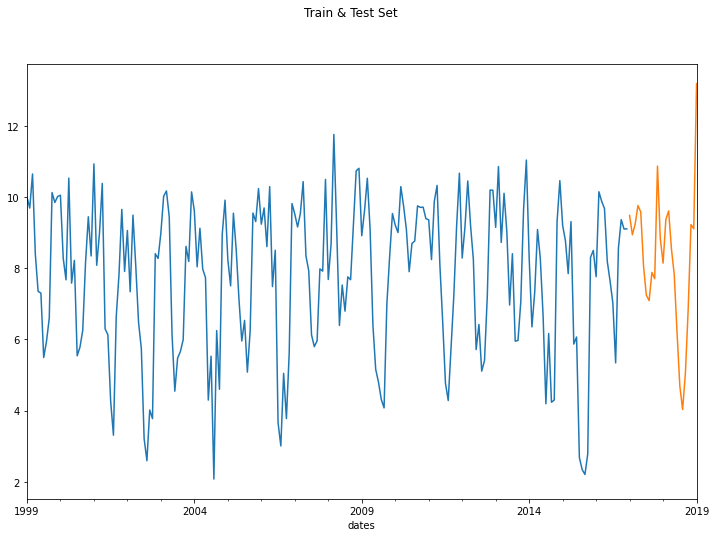

In [ ]:
## Split data into train & test set
train, test = df3['Precipitation'][:216], df3['Precipitation'][216:]
n = len(df3)
n_train = len(train)
n_test = len(test)

## Plot train & test set
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle("Train & Test Set")
train.plot(ax=ax);
test.plot(ax=ax);

In [ ]:
from statsmodels.tsa.stattools import adfuller
X = train
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print(f'Result: The series is {"not " if result[1] > 0.05 else ""}stationary')

ADF Statistic: -3.698323
p-value: 0.004137
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
Result: The series is stationary


In [ ]:
series = train
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(series)

KPSS Statistic: 0.09393575165633575
p-value: 0.1
num lags: 15
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


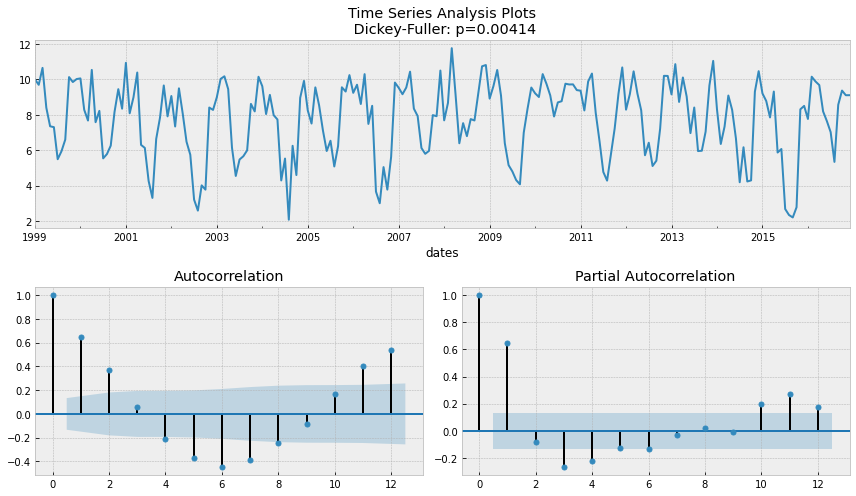

In [ ]:
import statsmodels.tsa.api as smt
import statsmodels.api as sm
def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(train, lags=12)

In [ ]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0,2)
d = range(0,1)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


In [ ]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df3.Precipitation,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=True,
                                            enforce_invertibility=True)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1693.5322474199647
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1474.8896216079195
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1048.2690376173314
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:923.6884273852249
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1442.1517048732567
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1292.4313411697226
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:997.5529625906856
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:888.5052980271437
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:957.4854282115832
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:934.5751923332359
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:921.0015107705485
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:859.6570712121486
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:957.9038053930856
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:929.513737092298
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:905.936099088098
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:838.5062577583068


In [ ]:
mod = sm.tsa.statespace.SARIMAX(df3.Precipitation,
                                order=(1, 0, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True)

results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9095      0.037     24.716      0.000       0.837       0.982
ma.L1         -0.4789      0.082     -5.811      0.000      -0.640      -0.317
ar.S.L12       0.9990      0.002    434.177      0.000       0.995       1.004
ma.S.L12      -0.9338      0.077    -12.166      0.000      -1.084      -0.783
sigma2         1.5711      0.183      8.592      0.000       1.213       1.929


In [ ]:
len(train),(len(df3)-1)

(216, 240)

In [ ]:
pred = results.predict(start=len(train),end=(len(df3)-1))
print(pred)
type(pred)

2017-01-01     9.081027
2017-02-01     9.083360
2017-03-01     9.547702
2017-04-01     9.411839
2017-05-01     7.663222
2017-06-01     7.593822
2017-07-01     6.672306
2017-08-01     6.246199
2017-09-01     7.359163
2017-10-01     8.565514
2017-11-01     9.976162
2017-12-01    10.969127
2018-01-01     9.213159
2018-02-01     8.542896
2018-03-01     9.454860
2018-04-01     9.563324
2018-05-01     7.345003
2018-06-01     6.651142
2018-07-01     5.452333
2018-08-01     4.608669
2018-09-01     5.266370
2018-10-01     6.258168
2018-11-01     8.597271
2018-12-01     9.407461
2019-01-01     8.575314
Freq: MS, dtype: float64


pandas.core.series.Series

In [ ]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(test,pred)
mape = metrics.mean_absolute_percentage_error(test,pred)
mse = metrics.mean_squared_error(test,pred)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(test,pred)

print("Results of sklearn.metrics for SARIMA Model:")
print("MAE:", mae)
print("MAPE:", mape)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics for SARIMA Model:
MAE: 0.8429969767982257
MAPE: 0.09821266121103694
MSE: 1.5209238853067064
RMSE: 1.2332574286444442
R-Squared: 0.5926934118384852


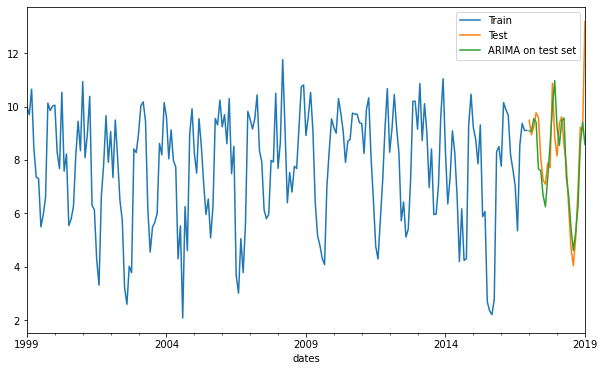

In [ ]:
train.plot(legend=True, label='Train',figsize=(10,6))
test.plot(legend=True, label='Test')
pred.plot(legend=True, label='ARIMA on test set')

In [ ]:
prediction = results.predict(start=len(df3),end=(len(df3)+36))
print(prediction)
type(prediction)

2019-02-01    10.508232
2019-03-01    10.866814
2019-04-01    10.698242
2019-05-01     8.887676
2019-06-01     7.797099
2019-07-01     6.644186
2019-08-01     6.001255
2019-09-01     6.784158
2019-10-01     7.781177
2019-11-01     9.752259
2019-12-01    10.140060
2020-01-01     9.719930
2020-02-01     9.401138
2020-03-01     9.858671
2020-04-01     9.780569
2020-05-01     8.053869
2020-06-01     7.039036
2020-07-01     5.955163
2020-08-01     5.374637
2020-09-01     6.212988
2020-10-01     7.260163
2020-11-01     9.275844
2020-12-01     9.705550
2021-01-01     9.324273
2021-02-01     9.040756
2021-03-01     9.529657
2021-04-01     9.480555
2021-05-01     7.781815
2021-06-01     6.791879
2021-07-01     5.730805
2021-08-01     5.170625
2021-09-01     6.026174
2021-10-01     7.088719
2021-11-01     9.117360
2021-12-01     9.560197
2022-01-01     9.191600
2022-02-01     8.919555
Freq: MS, dtype: float64


pandas.core.series.Series

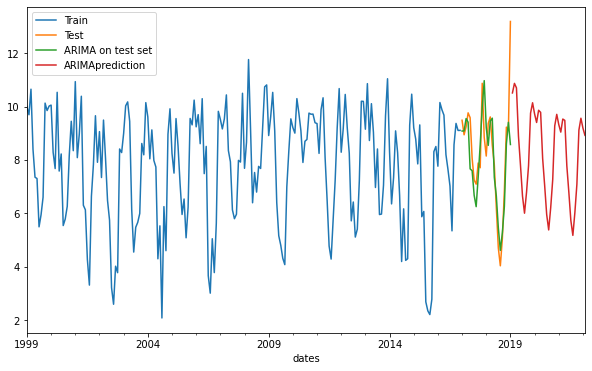

In [ ]:
train.plot(legend=True, label='Train',figsize=(10,6))
test.plot(legend=True, label='Test')
pred.plot(legend=True, label='ARIMA on test set')
prediction.plot(legend=True, label='ARIMAprediction')

## Training Exponential Smoothing

In [ ]:
es = ExponentialSmoothing(train, seasonal = "add", seasonal_periods=12)
model = es.fit(optimized = True, use_boxcox=True)

In [ ]:
test_pred = model.predict(len(train),len(df3)-1)

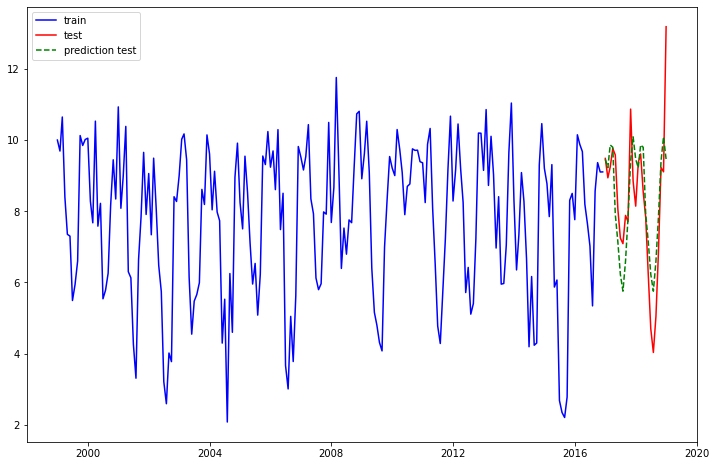

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(train, "b-", label = "train")
plt.plot(test, "r-", label = "test")
plt.plot(test_pred, "g--", label = "prediction test")
plt.legend()

In [ ]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(test,test_pred)
mape = metrics.mean_absolute_percentage_error(test,test_pred)
mse = metrics.mean_squared_error(test,test_pred)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(test,test_pred)

print("Results of sklearn.metrics for ETS Model:")
print("MAE:", mae)
print("MAPE:", mape)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics for ETS Model:
MAE: 0.9877797632279066
MAPE: 0.1321218364390769
MSE: 1.604351571158726
RMSE: 1.2666300056286073
R-Squared: 0.5703513035904159


In [ ]:
ETS_prediction = model.predict(start=len(df3),end=(len(df3)+36))
print(ETS_prediction)
type(ETS_prediction)

2019-02-01     9.224079
2019-03-01     9.862078
2019-04-01     9.798194
2019-05-01     7.912738
2019-06-01     7.136362
2019-07-01     6.224439
2019-08-01     5.753414
2019-09-01     6.599305
2019-10-01     7.834943
2019-11-01     9.408003
2019-12-01    10.090482
2020-01-01     9.459891
2020-02-01     9.224079
2020-03-01     9.862078
2020-04-01     9.798194
2020-05-01     7.912738
2020-06-01     7.136362
2020-07-01     6.224439
2020-08-01     5.753414
2020-09-01     6.599305
2020-10-01     7.834943
2020-11-01     9.408003
2020-12-01    10.090482
2021-01-01     9.459891
2021-02-01     9.224079
2021-03-01     9.862078
2021-04-01     9.798194
2021-05-01     7.912738
2021-06-01     7.136362
2021-07-01     6.224439
2021-08-01     5.753414
2021-09-01     6.599305
2021-10-01     7.834943
2021-11-01     9.408003
2021-12-01    10.090482
2022-01-01     9.459891
2022-02-01     9.224079
Freq: MS, dtype: float64


pandas.core.series.Series

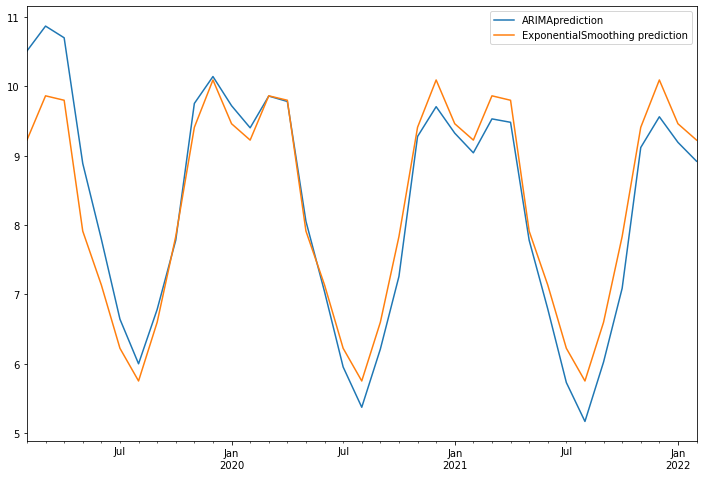

In [ ]:
plt.figure(figsize=(12,8))
prediction.plot(legend=True, label='ARIMAprediction')
ETS_prediction.plot(legend=True, label='ExponentialSmoothing prediction')